In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_excel(r'C:\Users\Muskan\Desktop\Superstore.xlsx')

In [6]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
dataset.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [8]:
print(dataset.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# Load the necessary columns for RFM analysis
rfm_df = dataset[['Customer ID', 'Order Date', 'Order ID', 'Sales']]


In [11]:
# Convert 'Order Date' to datetime
rfm_df['Order Date'] = pd.to_datetime(rfm_df['Order Date'])
rfm_df.head()

C:\Users\Muskan\AppData\Local\Temp\ipykernel_9252\1449960241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Order Date'] = pd.to_datetime(rfm_df['Order Date'])


,Customer ID,Order Date,Order ID,Sales
0,CG-12520,2016-11-08,CA-2016-152156,261.9600
1,CG-12520,2016-11-08,CA-2016-152156,731.9400
2,DV-13045,2016-06-12,CA-2016-138688,14.6200
3,SO-20335,2015-10-11,US-2015-108966,957.5775
4,SO-20335,2015-10-11,US-2015-108966,22.3680


In [12]:
# Get the latest date in the dataset to calculate recency
latest_date = rfm_df['Order Date'].max()

In [13]:
# Calculate Recency, Frequency, and Monetary
rfm = rfm_df.groupby('Customer ID').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,  # Recency
    'Order ID': 'nunique',  # Frequency
}).reset_index()

In [69]:
# Calculate Monetary (M)
rfm['Monetary'] = (dataset['Quantity'] * dataset['Sales']) - (dataset['Quantity'] * dataset['Sales'] * dataset['Discount']) + (dataset['Quantity'] * dataset['Sales'] * dataset['Profit'])  # Adjust Sales for discount and quantity

In [70]:
# Rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']


In [71]:
# Assign RFM scores based on quantiles
rfm['R_Score'] = pd.to_numeric(pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]))
rfm['F_Score'] = pd.to_numeric(pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]))
rfm['M_Score'] = pd.to_numeric(pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]))

In [72]:
# Calculate combined RFM score (sum of R, F, and M scores)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']


In [73]:
# Display the RFM table with scores
print(rfm.head())


  Customer ID  Recency  Frequency      Monetary  R_Score  F_Score  M_Score  \
0    AA-10315      184          5  2.248329e+04        2        2        5   
1    AA-10375       19          9  4.843584e+05        5        5        5   
2    AA-10480      259          4  2.301597e+02        1        1        2   
3    AA-10645       55          6 -1.831276e+06        3        3        1   
4    AB-10015      415          3  1.483625e+02        1        1        2   

   RFM_Score  
0          9  
1         15  
2          4  
3          7  
4          4  


In [74]:
# Customer segmentation based on combined RFM score
rfm['Customer Segment'] = pd.cut(rfm['RFM_Score'], bins=3, labels=['Lapsed', 'Average', 'Whales'], include_lowest=True)

# Display the RFM table with segmentation
print(rfm)


    Customer ID  Recency  Frequency      Monetary  R_Score  F_Score  M_Score  \
0      AA-10315      184          5  2.248329e+04        2        2        5   
1      AA-10375       19          9  4.843584e+05        5        5        5   
2      AA-10480      259          4  2.301597e+02        1        1        2   
3      AA-10645       55          6 -1.831276e+06        3        3        1   
4      AB-10015      415          3  1.483625e+02        1        1        2   
..          ...      ...        ...           ...      ...      ...      ...   
788    XP-21865       43         11  4.036684e+04        4        5        5   
789    YC-21895        4          5  7.961963e+01        5        3        2   
790    YS-21880        9          8  7.605891e+03        5        4        4   
791    ZC-21910       54         13  8.081013e+04        3        5        5   
792    ZD-21925      202          5  5.868267e+05        2        3        5   

     RFM_Score Customer Segment  
0    

In [100]:
segment_counts = rfm['Customer Segment'].value_counts().reset_index()
print(segment_counts)

  Customer Segment  count
0          Average    408
1           Lapsed    234
2           Whales    151


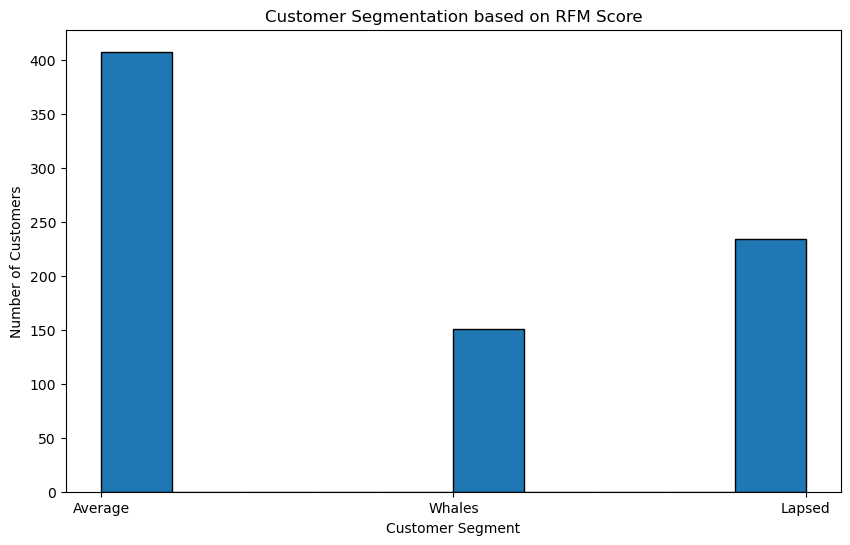

In [101]:
# Optional: Visualize the customer segmentation
plt.figure(figsize=(10, 6))
plt.hist(rfm['Customer Segment'], edgecolor='black')
plt.title('Customer Segmentation based on RFM Score')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

In [77]:
# Identify the most sold product
most_sold_product = dataset['Product Name'].value_counts().idxmax()
print('Most sold product:', most_sold_product)

Most sold product: Staple envelope


In [78]:
# Calculate total profit for each product
product_profit = dataset.groupby("Product Name")["Profit"].sum()

# Find the product with the highest profit
most_profitable_product = product_profit.idxmax()
most_profitable_product_value = product_profit.max()


In [79]:
# Print the results
print(f"Most profitable product: {most_profitable_product} with profit {most_profitable_product_value}")

Most profitable product: Canon imageCLASS 2200 Advanced Copier with profit 25199.927999999996


In [103]:
# Summary statistics for each segment
segment_summary = rfm.groupby('Customer Segment').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max']
}).reset_index()

segment_summary


Customer Segment     Recency                  Frequency                 \
                          mean median min   max      mean median min max   
0           Lapsed  303.730769  240.5   5  1165  4.307692    4.0   1  10   
1          Average   98.247549   58.0   0   781  6.497549    6.0   2  13   
2           Whales   34.807947   26.0   0   135  8.940397    9.0   4  17   

        Monetary                                            
            mean        median           min           max  
0 -421161.301304     54.374444 -8.874059e+07  1.594389e+07  
1   13650.353414    968.368550 -1.228634e+08  1.009952e+08  
2  407057.447780  14481.631325  4.667920e+00  2.071431e+07